<a href="https://colab.research.google.com/github/theaok/vis/blob/main/resMet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('bmh')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### height and self esteem

In [6]:
dat=pd.read_csv('https://drive.google.com/uc?id=1YH8DfzsQ8suZkVQBk7T9FTKvvm9Vyej8&export=download')
dat.head(5)

,Person,Height,Self Esteem
0,1,68,4.1
1,2,71,4.6
2,3,62,3.8
3,4,75,4.4
4,5,58,3.2


In [7]:
dat["Height"].mean() # median, mode, stdev
dat["Height"].median()

65.4

66.0

In [ ]:
dat[['Height','Self Esteem']].corr().round(2)

,Height,Self Esteem
Height,1.00,0.73
Self Esteem,0.73,1.00


<Axes: >

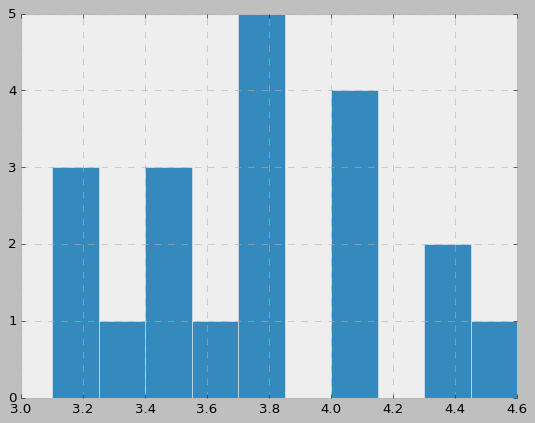

In [34]:
dat["Self Esteem"].hist()

<Axes: xlabel='Height', ylabel='Self Esteem'>

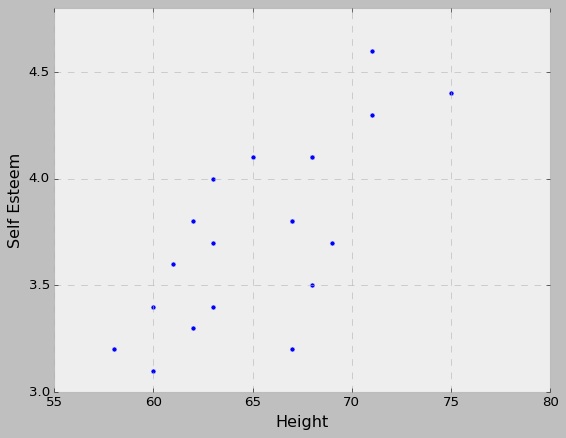

In [35]:
dat.plot(kind='scatter', y='Self Esteem', x='Height')

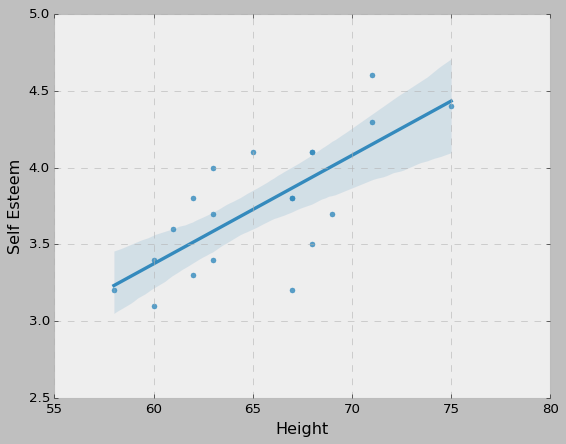

In [36]:
sns.regplot(y="Self Esteem", x="Height", data=dat);

In [15]:
result = sm.ols(formula="dat['Self Esteem'] ~ Height", data=dat).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     dat['Self Esteem']   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     20.61
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           0.000254
Time:                        14:21:42   Log-Likelihood:                -3.1717
No. Observations:                  20   AIC:                             10.34
Df Residuals:                      18   BIC:                             12.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8663      1.020     -0.849      0.4

### wages

In [9]:
wages=pd.read_stata('https://github.com/theaok/data/raw/refs/heads/main/wages.dta')

In [ ]:
wages.head(5)

,wage,educ,exp,union,nonwhite,hispanic,female,married,south,_est_logit,wageQ
0,4.9998,12,4,no,no,no,male,no,yes,1,1
1,17.2500,18,5,no,no,no,male,yes,no,1,4
2,9.8601,15,13,no,no,no,male,yes,no,1,3
3,14.9990,12,39,yes,no,no,male,yes,no,1,4
4,4.0000,12,4,no,no,no,male,no,no,1,0


In [39]:
#wages['wage'].quantile(0.2)
wages['expQ'] = pd.qcut(wages['exp'], 5, labels=False)

<Axes: xlabel='female', ylabel='wage'>

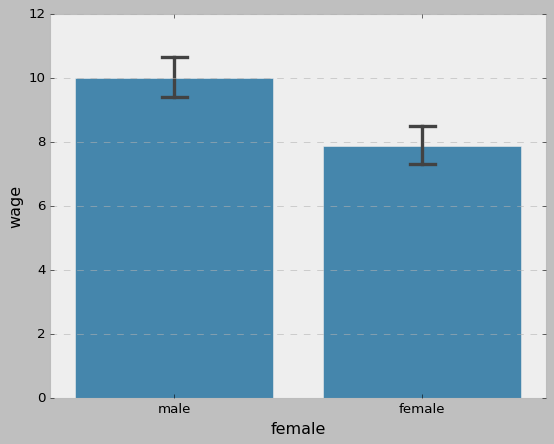

In [37]:
sns.barplot(data=wages, y='wage', x='female', estimator=np.mean, errorbar=('ci', 95), capsize=.1, orient='v')

<Axes: xlabel='expQ', ylabel='wage'>

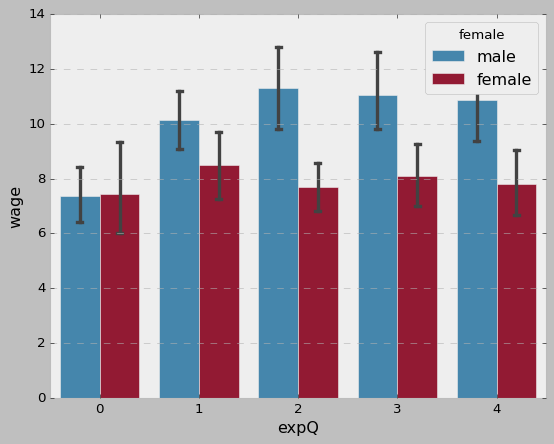

In [40]:
sns.barplot(data=wages, y='wage', x='expQ', hue='female', estimator=np.mean, errorbar=('ci', 95), capsize=.1, orient='v')

<Axes: xlabel='female', ylabel='wage'>

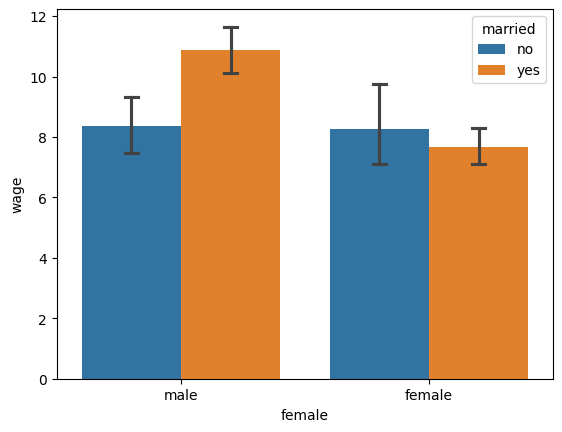

In [ ]:
sns.barplot(data=wages, y='wage', x='female', hue='married', estimator=np.mean, errorbar=('ci', 95), capsize=.1, orient='v')

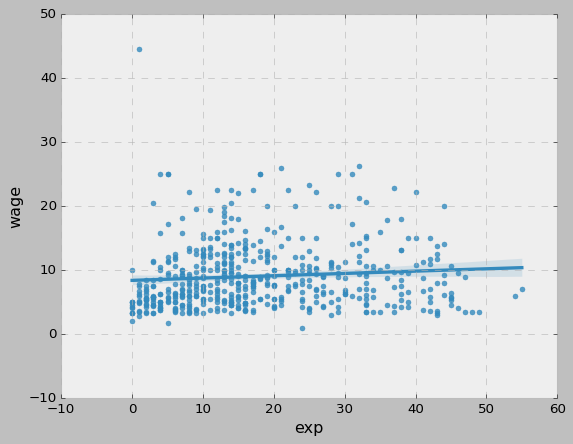

In [41]:
sns.regplot(x="exp", y="wage", data=wages);

In [ ]:
result = sm.ols(formula="wage ~ educ + exp + married", data=wages).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     45.45
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           3.78e-26
Time:                        20:12:18   Log-Likelihood:                -1570.2
No. Observations:                 534   AIC:                             3148.
Df Residuals:                     530   BIC:                             3165.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -5.0704      1.225     -4.